## **Análisis de información - Laptops Mercado Libre**

### **1. Recolección de datos**

Importamos librerías necesarias, en especial BeautifulSoup para hacer web scrapping. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Definimos una función que va a extraer los datos necesarios para dar respuesta a nuestros objetivos. 

In [2]:
# Función para extraer información
def obtener_laptops(url, headers):
    response_ml = requests.get(url, headers=headers)
    soup_ml = BeautifulSoup(response_ml.text, 'lxml')
    laptops = []
    
    # Extraer información de laptops de la página actual
    for item in soup_ml.find_all('div', class_='ui-search-result__wrapper'):
        try:
            # Extraer el nombre de la laptop
            nombre = item.find('h2', class_='poly-component__title').text.strip()
        except AttributeError:
            nombre = 'Sin nombre'
        try:
            # Extraer la marca de la laptop
            marca = item.find('span', class_='poly-component__brand').text.strip()
        except AttributeError:
            marca = 'Sin marca'
        try:
            # Extraer el precio con descuento
            precio= item.find('span', class_='andes-money-amount__fraction').text.strip()
        except AttributeError:
            precio = 'Sin precio'
        try:
            # Extraer el vendedor
            vendedor = item.find('span', class_='poly-component__seller').text.strip()
        except AttributeError:
            vendedor = 'Sin vendedor'
        try:
            # Extraer los meses sin intereses
            meses_sin_intereses = item.find('span', class_='poly-price__installments poly-text-positive').text.strip()
        except AttributeError:
            meses_sin_intereses = 'Sin meses sin intereses'
        try:
            # Extraer el descuento
            descuento = item.find('span', class_='andes-money-amount__discount').text.strip()
        except AttributeError:
            descuento = 'Sin descuento'
        try:
            # Extraer la calificación promedio
            calificacion_promedio = item.find('span', class_='poly-reviews__rating').text.strip()
        except AttributeError:
            calificacion_promedio = 'Sin calificación'
        try:
            # Extraer la cantidad de reseñas
            cantidad_reseñas = item.find('span', class_='poly-reviews__total').text.strip()
        except AttributeError:
            cantidad_reseñas = 'Sin reseñas'
        
        # Agregar los datos a la lista
        laptops.append({
            'nombre': nombre,
            'marca': marca,
            'precio': precio,
            'vendedor': vendedor,
            'meses_sin_intereses': meses_sin_intereses,
            'descuento': descuento,
            'calificacion_promedio': calificacion_promedio,
            'cantidad_reseñas': cantidad_reseñas
        })
    
    return laptops

Definimos el encabezado para la solicitud y la lista de URLs de donde se van a recolectar los datos.

In [3]:
# Encabezados para la solicitud
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36"
}
# Lista de URLs directas a las páginas de Mercado Libre
base_url = "https://listado.mercadolibre.com.mx/computacion/laptops-accesorios/laptops/laptops_Desde_{}_NoIndex_True"
urls_ml = [base_url.format(i) for i in range(1, 1300, 50)]  

Extraemos los datos y los guardamos en una lista. Este proceso tarda un poco debido a la cantidad de datos a extraer.

In [4]:
# Lista para almacenar todos los datos
laptops_ml_total = []

# Iterar sobre cada URL y obtener los datos
for url in urls_ml:
    laptops_ml_total.extend(obtener_laptops(url, headers))


Con los datos extraidos, creamos un DataFrame y mostramos los datos.

In [5]:
# Crear DataFrame con todos los datos
ml_df = pd.DataFrame(laptops_ml_total)
ml_df.to_csv('laptops_ml.csv', index=False)
ml_df

,nombre,marca,precio,vendedor,meses_sin_intereses,descuento,calificacion_promedio,cantidad_reseñas
0,Laptop VSAP VNJH1402 14.1'' Intel Celeron N402...,Sin marca,"6,667",Por JOKBEN,Sin meses sin intereses,45% OFF,4.4,(103)
1,Notebook 2 en 1 Intel Celeron DDR4 16GB RAM 51...,Sin marca,"12,165",Sin vendedor,en 15 meses sin intereses de $373.08,53% OFF,4.0,(42)
2,Laptop Hp 240 G9 Intel Core I3-1215u 12va Gene...,HP,"6,499",Por Aindi Mexico,en 15 meses sin intereses de $445.93,3% OFF,4.8,(85)
3,Laptop Lenovo Ideapad Celeron 4gb + 128ssd + O...,LENOVO,"3,699",Por CSHOP,Sin meses sin intereses,Sin descuento,4.5,(988)
4,"Portátil Ultrabook L16AIR 16"" plateado 16GB de...",MACHENIKE,"24,351",Por MACHENIKE Official Store,en 15 meses sin intereses de $893.64,44% OFF,4.7,(342)
...,...,...,...,...,...,...,...,...
1349,Laptop Asus D 515 D Usada En Caja 1 Mes Uso En...,ASUS,"5,500",Sin vendedor,Sin meses sin intereses,Sin descuento,Sin calificación,Sin reseñas
1350,Laptop Lenovo Ideapad 3 Core I5 11th 12gb Ram ...,LENOVO,"6,600",Sin vendedor,Sin meses sin intereses,Sin descuento,Sin calificación,Sin reseñas
1351,Laptop Compaq Presario 100 Vintage Usado!!!,Sin marca,"1,950",Sin vendedor,Sin meses sin intereses,Sin descuento,Sin calificación,Sin reseñas
1352,Laptop Dell Inspiron 3595 Amd A9-9425 8gb 256g...,DELL,"5,499",Sin vendedor,en 15 meses sin intereses de $322.61,12% OFF,Sin calificación,Sin reseñas


### **2. OBJETIVOS**

En esta sección vamos a usar los datos recolectados para dar respuesta a los objetivos planteados. Para esto, vamos a aplicar las técnicas de limpieza, filtrado, y transformación de datos que sean necesarias para cada caso. 

#### **`Objetivo 1`** : Marcas principales que maneja mercado libre de Laptos

**Datos necesarios:** columna *marcas*:

In [6]:
df_marcas = ml_df[['marca']] 

**Limpieza de datos:** Vamos a eliminar los valores *sin marca*, ya que esos no van a aportar a nuestro análisis.

In [7]:
df_marcas = df_marcas[df_marcas['marca'] != 'Sin marca']

**Normalización de datos:** Vamos a convertir las marcas a minúsculas y a quitar espacios innecesarios.

In [8]:
df_marcas['marca'] = df_marcas['marca'].str.lower().str.strip()

**Consulta:** Se cuentan las ocurrencias de cada marca 

In [9]:
conteo_marcas = df_marcas['marca'].value_counts()

**Resultados:** Se muestran las 10 principales marcas en un DataFrame.

In [10]:
top_marcas = conteo_marcas.head(10).reset_index()
top_marcas.columns = ['marca', 'cantidad']

top_marcas

,marca,cantidad
0,hp,299
1,lenovo,286
2,dell,285
3,asus,76
4,acer,47
5,msi,23
6,microsoft,15
7,thunderobot,11
8,machenike,11
9,toshiba,11


**Representación gráfica:** Se visualizan los resultados obtenidos de forma gráfica.

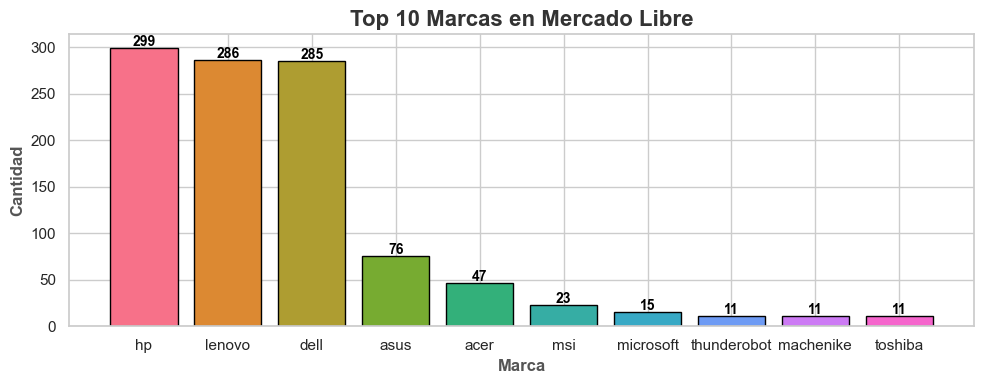

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de Seaborn
sns.set(style="whitegrid")
# Colores personalizados
colors = sns.color_palette("husl", len(top_marcas))
# Tamaño del gráfico
plt.figure(figsize=(10, 4))
# Crear el gráfico de barras
bars = plt.bar(top_marcas['marca'], top_marcas['cantidad'], color=colors, edgecolor="black")
# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', fontsize=10, color="black", weight="bold")
# Títulos y etiquetas
plt.title('Top 10 Marcas en Mercado Libre', fontsize=16, fontweight='bold', color="#333333")
plt.xlabel('Marca', fontsize=12, fontweight='bold', color="#555555")
plt.ylabel('Cantidad', fontsize=12, fontweight='bold', color="#555555")
# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### **`Objetivo 2`** : Comparación de precios por marca de Laptops en Mercado Libre.


**Datos necesarios**: columnas *marca* y *precio*.

In [12]:
df_precio_marca = ml_df[['marca', 'precio']]

**Limpieza de datos:** Vamos a eliminar los valores *sin marca* y *son precio*, ya que esos no van a aportar a nuestro análisis.

In [13]:
df_precio_marca = ml_df[ml_df['marca'] != 'Sin marca'].copy()
df_precio_marca = df_precio_marca[df_precio_marca['precio'] != 'Sin precio'].copy()

**Normalización de datos:** Vamos a convertir las marcas a minúsculas y a quitar espacios innecesarios. Además convertimos los precios a tipo entero y quitamos las comas.

In [14]:
df_precio_marca['marca'] = df_precio_marca['marca'].str.lower().str.strip()
df_precio_marca['precio'] = df_precio_marca['precio'].str.replace(',', '').astype(int)

**Consulta:** Se calcula el precio promedio por marca

In [15]:
# Calcular el precio promedio por marca
precio_promedio_marca = df_precio_marca.groupby('marca')['precio'].mean().reset_index()

**Resultados:** Se muestran las marcas y su precio promedio, ordenadas de mayor a menor precio. 

In [16]:
# Redondear el precio promedio a dos decimales
precio_promedio_marca['precio'] = precio_promedio_marca['precio'].round(2)

# Ordenar las marcas por precio promedio en orden descendente
precio_promedio_marca = precio_promedio_marca.sort_values(by='precio', ascending=False)

# Mostrar las 10 marcas con precios promedio más altos
top_precio_marca = precio_promedio_marca.head(10)
top_precio_marca

,marca,precio
14,thunderobot,44476.36
7,machenike,30842.82
9,msi,23394.91
11,razer,20899.20
1,asus,17474.07
5,huawei,15995.17
10,panasonic,12919.60
4,hp,11135.43
0,acer,10840.68
8,microsoft,10760.00


**Representación gráfica:** Se visualizan los resultados obtenidos de forma gráfica.

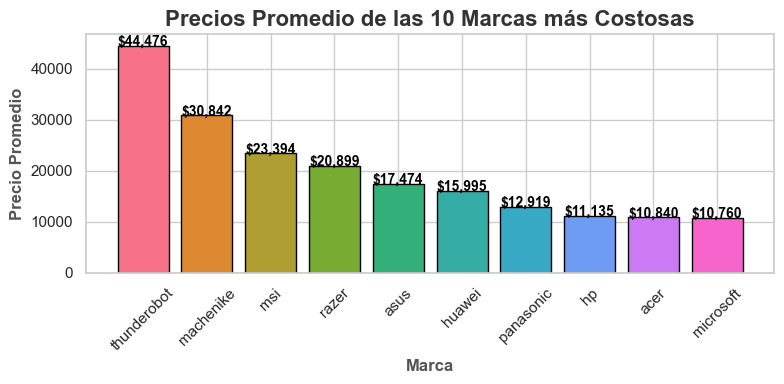

In [17]:
# Estilo de Seabach
sns.set(style="whitegrid")
# Colores personalizados
colors = sns.color_palette("husl", len(top_precio_marca))
# Tamaño del gráfico
plt.figure(figsize=(8, 4))
# Crear el gráfico de barras
bars = plt.bar(top_precio_marca['marca'], top_precio_marca['precio'], color=colors, edgecolor="black")
# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f"${int(yval):,}", ha='center', fontsize=10, color="black", weight="bold")
# Títulos y etiquetas
plt.title('Precios Promedio de las 10 Marcas más Costosas', fontsize=16, fontweight='bold', color="#333333")
plt.xlabel('Marca', fontsize=12, fontweight='bold', color="#555555")
plt.ylabel('Precio Promedio', fontsize=12, fontweight='bold', color="#555555")
# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **`Objetivo 3`** : Producto con mejores reseñas

**Datos necesarios:** columnas *nombre, calificación promedio, cantidad de reseñas*:

In [18]:
# Seleccionar las columnas necesarias
df_reseñas = ml_df[['nombre', 'calificacion_promedio', 'cantidad_reseñas']]

**Limpieza de datos:** Vamos a eliminar los valores *sin resñas* y *so¿in calificación*, ya que esos no van a aportar a nuestro análisis.

In [19]:
# Eliminar valores "Sin marca", "Sin calificación" y "Sin reseñas"
df_reseñas = df_reseñas[(df_reseñas['calificacion_promedio'] != 'Sin calificación') & 
                         (df_reseñas['cantidad_reseñas'] != 'Sin reseñas')]

**Normalización de datos:** Verificamos tipo de dato de las columnas, y como necesitamos trabajar con números, las convertimos.

In [20]:
# Verificar el tipo de cada columna
print(df_reseñas.dtypes)

nombre                   object
calificacion_promedio    object
cantidad_reseñas         object
dtype: object


In [21]:
df_reseñas['calificacion_promedio'] = df_reseñas['calificacion_promedio'].replace(r'[^\d.]', '', regex=True)
df_reseñas['cantidad_reseñas'] = df_reseñas['cantidad_reseñas'].replace(r'[^\d]', '', regex=True)

# Ahora convertimos las columnas a tipos numéricos
df_reseñas['calificacion_promedio'] = pd.to_numeric(df_reseñas['calificacion_promedio'], errors='coerce')
df_reseñas['cantidad_reseñas'] = pd.to_numeric(df_reseñas['cantidad_reseñas'], errors='coerce')

# Verificamos los tipos de datos
print(df_reseñas.dtypes)

nombre                    object
calificacion_promedio    float64
cantidad_reseñas           int64
dtype: object


**Consulta y resultados:** Se ordenan los datos por mejor calificación y mayor cantidad de reseñas.

In [22]:
df_reseñas = df_reseñas.sort_values(by=['calificacion_promedio','cantidad_reseñas'], ascending=[False,False])

df_reseñas.head(10)


,nombre,calificacion_promedio,cantidad_reseñas
364,Laptop Hp 14-dq0532la Intel Celeron-n4120 4gb ...,5.0,42
417,"Hp Envy 2 en 1 14-es1023dx 14"" Fhd Touch Intel...",5.0,29
143,Laptop Gamer Lenovo Loq Ryzen 7-7435h 16 Ram 5...,5.0,24
249,Laptop Gamer Lenovo Loq Nvidia Geforce Rtx 205...,5.0,22
32,Laptop Gamer Thunderbot Zero Rtx4070 I9-14900h...,5.0,16
63,Laptop Gamer Thunderbot Zero Rtx4070 I9-14900h...,5.0,16
419,Laptop Gamer Asus Tuf Gaming A15 Nvidia Geforc...,5.0,15
688,Laptop 15.6+7 Pantalla Doble Intel Celeron N10...,5.0,14
1006,Laptop Lenovo V15 G3 Intel Core I7-1255u 512gb...,5.0,12
74,Laptop A15 B7vf-099mx Thin 16 GB RAM Windows C...,5.0,11


**Representación gráfica:** Se visualizan los resultados obtenidos de forma gráfica.

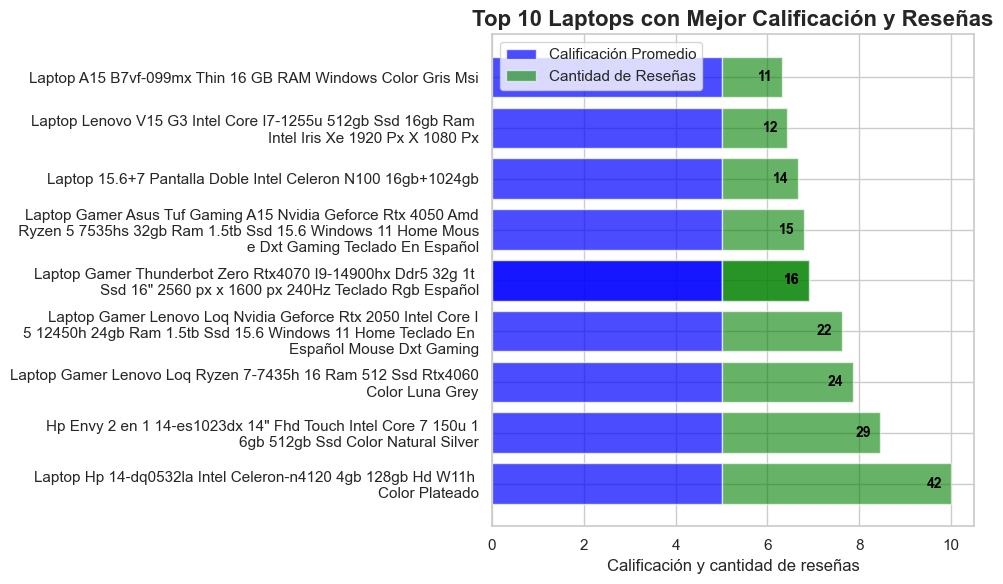

In [23]:
import matplotlib.pyplot as plt

df_top_10 = df_reseñas.head(10).copy()

# Normalizar las calificaciones y la cantidad de reseñas
df_top_10['calificacion_normalizada'] = df_top_10['calificacion_promedio']
max_reseñas = df_top_10['cantidad_reseñas'].max()
df_top_10['cantidad_reseñas_normalizada'] = df_top_10['cantidad_reseñas'] / max_reseñas * 5

# Limitar la longitud de los nombres y agregar saltos de línea para que se vea mejor
max_length = 60  # Longitud máxima de un nombre antes de cortar y agregar salto de línea
df_top_10['nombre'] = df_top_10['nombre'].apply(lambda x: '\n'.join([x[i:i+max_length] for i in range(0, len(x), max_length)]))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))

# Crear las barras para la calificación
bars_calificacion = plt.barh(df_top_10['nombre'], df_top_10['calificacion_normalizada'], label='Calificación Promedio', color='blue', alpha=0.7)

# Crear las barras para la cantidad de reseñas
bars_reseñas = plt.barh(df_top_10['nombre'], df_top_10['cantidad_reseñas_normalizada'], label='Cantidad de Reseñas', left=df_top_10['calificacion_normalizada'], color='green', alpha=0.6)

# Añadir etiquetas de cantidad de reseñas sobre las barras
for i, bar in enumerate(bars_reseñas):
    plt.text(bar.get_width() + bar.get_x() - 0.2, bar.get_y() + bar.get_height() / 2,  # Coordenadas para la etiqueta
             f'{df_top_10["cantidad_reseñas"].iloc[i]:,.0f}',  # Formateo de número
             va='center', ha='right', color='black', fontsize=10, weight='bold')

# Añadir etiquetas y título
plt.xlabel('Calificación y cantidad de reseñas', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title('Top 10 Laptops con Mejor Calificación y Reseñas', fontsize=16, fontweight='bold')
plt.legend()

# Ajustar el gráfico para una mejor visualización sin warnings
plt.subplots_adjust(left=0.15, right=0.85)  # Ajustar los márgenes para que haya espacio para la lista

# Mostrar el gráfico
plt.tight_layout()  
plt.show()



#### **`Objetivo 4`** : Porcentaje promedio de descuento por marca

Seleccionar las columnas necesarias.


In [24]:
df_descuentos = ml_df[['marca', 'descuento']]

Limpiamos los datos y eliminamos valores "Sin marca" y "Sin descuento".

In [25]:
df_descuentos = df_descuentos[
    (df_descuentos['marca'] != 'Sin marca') & 
    (df_descuentos['descuento'] != 'Sin descuento')
]

Normalizar el formato de la columna 'marca' (convertir a minúsculas y quitar espacios extras).

In [26]:
df_descuentos['marca'] = df_descuentos['marca'].str.lower().str.strip()

Extraer solo los valores numéricos de la columna 'descuento' y convertirlos a float.

In [27]:
df_descuentos['descuento'] = df_descuentos['descuento'].str.extract(r'(\d+)').astype(float)

Calcular el porcentaje promedio de descuento por marca.

In [28]:
promedio_descuento = df_descuentos.groupby('marca')['descuento'].mean().reset_index()

Renombrar las columnas.

In [29]:
promedio_descuento.columns = ['marca', 'promedio_descuento']

Ordenar por porcentaje promedio de descuento (descendente) y seleccionar las marcas principales (top 10).

In [30]:
top_descuentos = promedio_descuento.sort_values(by='promedio_descuento', ascending=False).head(10)

Mostramos resultados.

In [31]:
print(top_descuentos)

          marca  promedio_descuento
13  thunderobot           37.727273
14      toshiba           36.000000
8     microsoft           31.785714
7     machenike           31.090909
0          acer           28.133333
2          dell           26.720000
6        lenovo           26.179641
4            hp           25.731034
1          asus           25.022727
10    panasonic           25.000000


Graficamos.

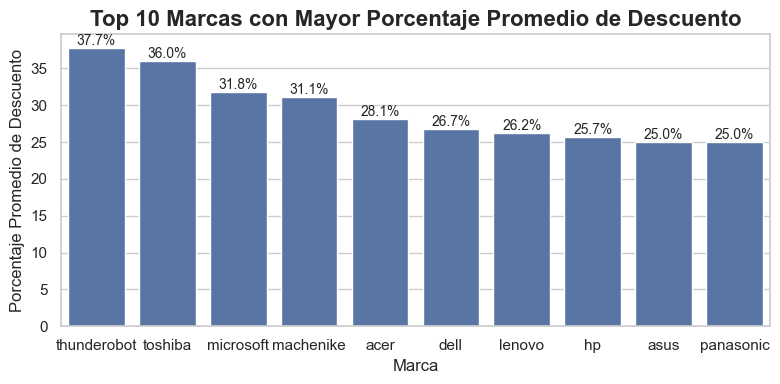

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de Seaborn para un diseño más atractivo
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(
    data=top_descuentos, 
    x='marca', 
    y='promedio_descuento'
)

# Agregar etiquetas y título
bar_plot.set_title('Top 10 Marcas con Mayor Porcentaje Promedio de Descuento', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Marca', fontsize=12)
bar_plot.set_ylabel('Porcentaje Promedio de Descuento', fontsize=12)


# Mostrar los valores en la parte superior de las barras
for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt='%.1f%%', label_type='edge', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### **`Objetivo 5`** : Cantidad de meses sin intereses por marca

Función para extraer el número de meses sin intereses.


In [33]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Función para extraer el número de meses sin intereses
def extraer_meses_sin_intereses(texto):
    if isinstance(texto, str):  # Verifica si el texto es de tipo string
        if 'Sin meses sin intereses' in texto:
            return 0  # Si no hay meses, se asigna 0
        # Busca el número de meses en el texto
        match = re.search(r'(\d+)\s+meses', texto)
        if match:
            return int(match.group(1))  # Devuelve el número de meses
    return 0  # Si no es un string o no encuentra el patrón, retorna 0

# Asegurarse de que la columna 'meses_sin_intereses' sea de tipo string
ml_df['meses_sin_intereses'] = ml_df['meses_sin_intereses'].astype(str)

# Mostramos cómo es la columna antes de aplicar la función
print("Antes de aplicar la función: ")
ml_df['meses_sin_intereses'].head()  # Muestra los primeros valores de la columna

Antes de aplicar la función: 


0                 Sin meses sin intereses
1    en 15 meses sin intereses de $373.08
2    en 15 meses sin intereses de $445.93
3                 Sin meses sin intereses
4    en 15 meses sin intereses de $893.64
Name: meses_sin_intereses, dtype: object

Aplicamos la función a la columna 'meses_sin_intereses'.


In [34]:
ml_df['meses_sin_intereses'] = ml_df['meses_sin_intereses'].apply(extraer_meses_sin_intereses)

Mostramos cómo queda la columna después de aplicar la función.

In [35]:
print("\nDespués de aplicar la función: ")
print(ml_df['meses_sin_intereses'].head())  # Muestra los primeros valores de la columna después de la transformación


Después de aplicar la función: 
0     0
1    15
2    15
3     0
4    15
Name: meses_sin_intereses, dtype: int64


Agrupamos los meses sin intereses por marca y los mostramos gráficamente.

C:\Users\Karla\AppData\Local\Temp\ipykernel_20612\1353750637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_meses_por_marca, x='meses_sin_intereses', y='marca', palette='viridis')


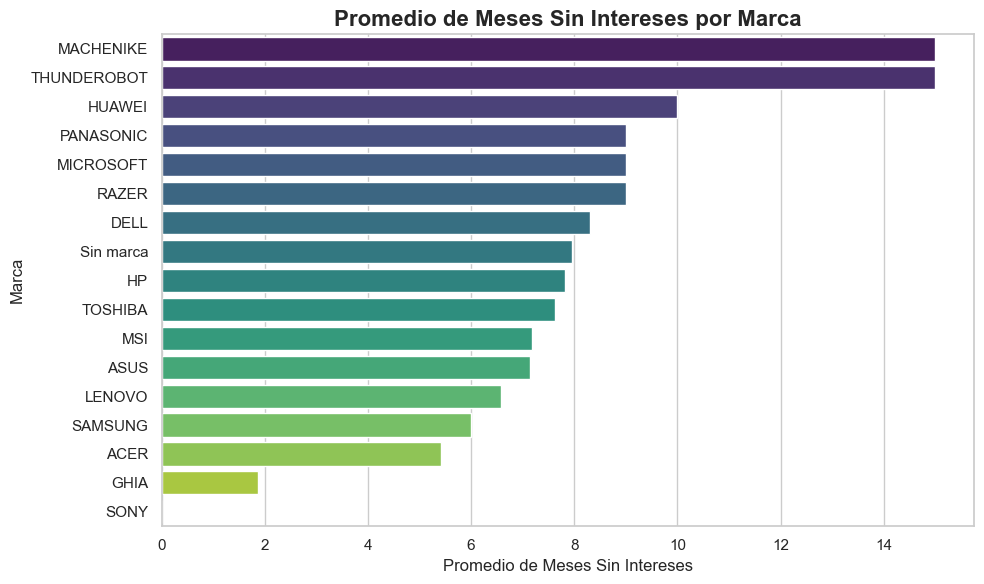

In [41]:
# Paso 1: Agrupar por marca y calcular el promedio de meses sin intereses
df_meses_por_marca = ml_df.groupby('marca')['meses_sin_intereses'].mean().reset_index()

# Paso 2: Ordenar por el promedio de meses sin intereses (de mayor a menor)
df_meses_por_marca = df_meses_por_marca.sort_values(by='meses_sin_intereses', ascending=False)

# Paso 3: Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=df_meses_por_marca, x='meses_sin_intereses', y='marca', palette='viridis')

# Añadir título y etiquetas
plt.title('Promedio de Meses Sin Intereses por Marca', fontsize=16, fontweight='bold')
plt.xlabel('Promedio de Meses Sin Intereses', fontsize=12)
plt.ylabel('Marca', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### **`Objetivo 6`** : Análisis de los vendedores más activos y sus principales marcas

Mostramos los primeros valores de la columna de vendedores antes de aplicar la limpieza.


In [36]:
import pandas as pd

print("Antes de limpiar los datos: ")
print(ml_df['vendedor'].head())

Antes de limpiar los datos: 
0                      Por JOKBEN
1                    Sin vendedor
2                Por Aindi Mexico
3                       Por CSHOP
4    Por MACHENIKE Official Store
Name: vendedor, dtype: object


Función para limpiar la columna de vendedores.


In [37]:
def limpiar_vendedor(vendedor):
    if isinstance(vendedor, str):  # Verifica si el valor es una cadena
        if 'Sin vendedor' in vendedor:
            return 0  # Reemplaza "Sin vendedor" con 0
        if 'Por' in vendedor:
            # Extrae el nombre del vendedor después de "Por"
            return vendedor.split("Por")[-1].strip().lower()  # Convierte el nombre a minúsculas
    return 0  # Si no cumple con ninguna condición, devuelve 0

# Aplicamos la función a la columna 'vendedor'
ml_df['vendedor'] = ml_df['vendedor'].apply(limpiar_vendedor)

# Mostramos cómo queda la columna después de limpiar los datos
print("\nDespués de limpiar los datos: ")
print(ml_df['vendedor'].head())


Después de limpiar los datos: 
0                      jokben
1                           0
2                aindi mexico
3                       cshop
4    machenike official store
Name: vendedor, dtype: object


Ahora contamos la frecuencia de aparición de cada vendedor (excluyendo los que son 0).


In [38]:
conteo_vendedores = ml_df['vendedor'].value_counts()


Mostramos los  vendedores más activos.


In [39]:
print("\nVendedores más activos (los primeros 10):")
conteo_vendedores.head()


Vendedores más activos (los primeros 10):


vendedor
0                     919
grupo decme            54
pcel                   33
electronics mexico     33
globallaptops          33
Name: count, dtype: int64

Graficamos.

C:\Users\Karla\AppData\Local\Temp\ipykernel_20612\2047601344.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_vendedores_top_10.index, y=conteo_vendedores_top_10.values, palette=colores)  # Usamos la paleta de colores
C:\Users\Karla\AppData\Local\Temp\ipykernel_20612\2047601344.py:18: UserWarning: The palette list has more values (72) than needed (10), which may not be intended.
  ax = sns.barplot(x=conteo_vendedores_top_10.index, y=conteo_vendedores_top_10.values, palette=colores)  # Usamos la paleta de colores


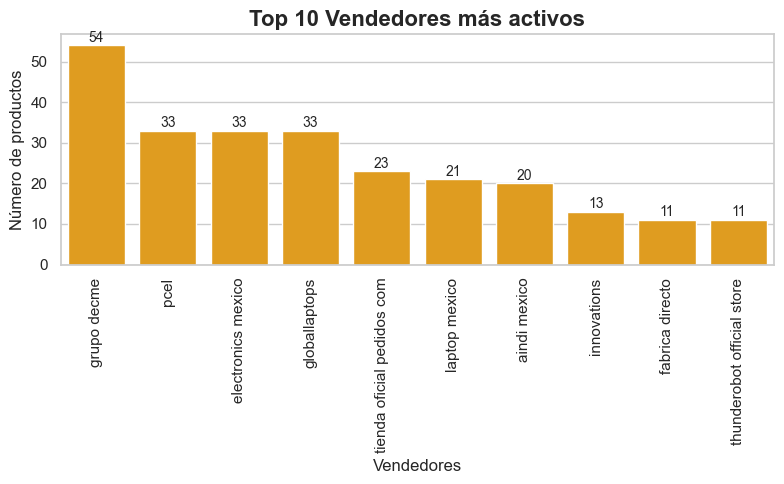

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los vendedores que no tienen productos (valor 0)
conteo_vendedores = conteo_vendedores[conteo_vendedores.index != 'Sin vendedor']

# Definimos los primeros 10 vendedores más frecuentes
primeros_10_vendedores = conteo_vendedores.head(10).index

# Crear una lista de colores, donde los primeros 10 vendedores tendrán un color diferente
colores = ['orange' if vendedor in primeros_10_vendedores else 'blue' for vendedor in conteo_vendedores.index]

# Filtramos solo los primeros 10 vendedores para la visualización
conteo_vendedores_top_10 = conteo_vendedores[primeros_10_vendedores]

# Graficamos la actividad de los 10 vendedores más activos
plt.figure(figsize=(8, 5))  # Aumentamos el tamaño para tener más espacio
ax = sns.barplot(x=conteo_vendedores_top_10.index, y=conteo_vendedores_top_10.values, palette=colores)  # Usamos la paleta de colores

# Añadimos el número de veces que aparece cada vendedor encima de las barras
for i, v in enumerate(conteo_vendedores_top_10.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)  # Ajustamos la posición y el tamaño del texto

plt.title('Top 10 Vendedores más activos', fontsize=16, fontweight='bold')
plt.xlabel('Vendedores', fontsize=12)
plt.ylabel('Número de productos', fontsize=12)
plt.xticks(rotation=90)  # Aseguramos que los nombres de los vendedores sean legibles
plt.tight_layout()  # Ajustamos el layout para que no se corten las etiquetas
plt.show()



In [48]:
# Filtramos los productos de los 10 vendedores más activos
productos_top_10_vendedores = ml_df[ml_df['vendedor'].isin(primeros_10_vendedores)]

# Agrupar por vendedor y marca, y contar la cantidad de productos que venden
marcas_por_vendedor = productos_top_10_vendedores.groupby(['vendedor', 'marca']).size().reset_index(name='cantidad_productos')

# Mostrar las marcas que venden los 10 vendedores más activos
marcas_por_vendedor.head()


,vendedor,marca,cantidad_productos
0,aindi mexico,DELL,1
1,aindi mexico,HP,16
2,aindi mexico,LENOVO,3
3,electronics mexico,ACER,5
4,electronics mexico,ASUS,6


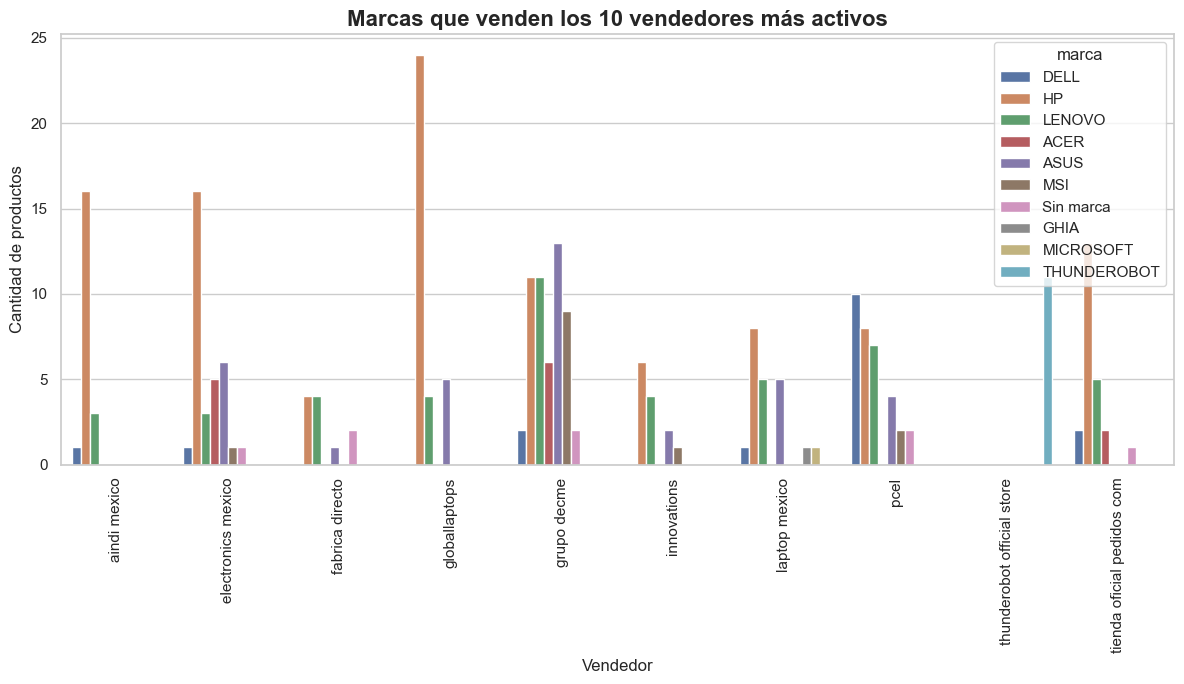

In [50]:
# Crear un gráfico para mostrar la cantidad de marcas por vendedor
plt.figure(figsize=(12, 7))

# Crear el gráfico de barras
sns.barplot(x='vendedor', y='cantidad_productos', hue='marca', data=marcas_por_vendedor)

# Añadir título y etiquetas
plt.title('Marcas que venden los 10 vendedores más activos', fontsize=16, fontweight='bold')
plt.xlabel('Vendedor', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.xticks(rotation=90)  # Asegurar que los nombres de los vendedores sean legibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()
